<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/ESAA_YB3_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설정
# 나눔 바른 고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
print("한글 폰트 설정 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 전처리 코드

## 1. train

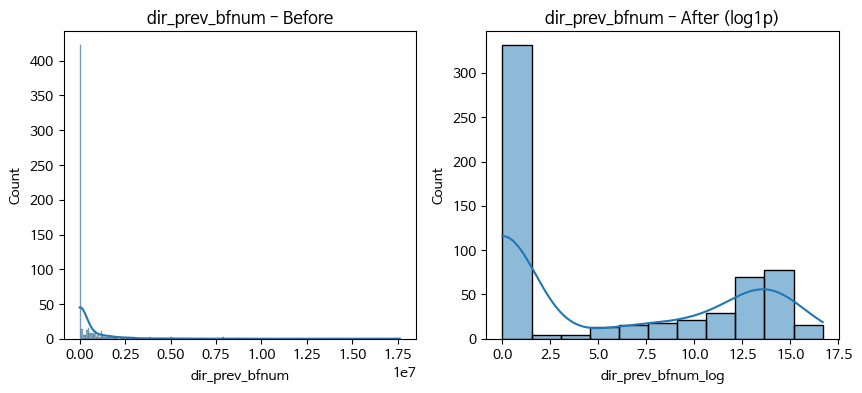

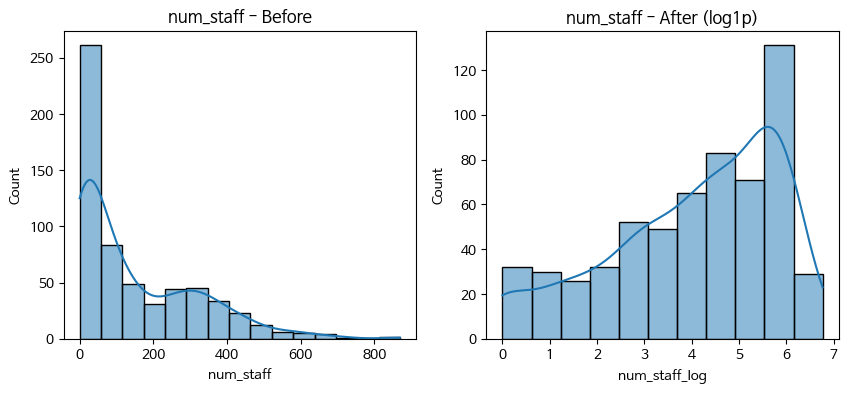

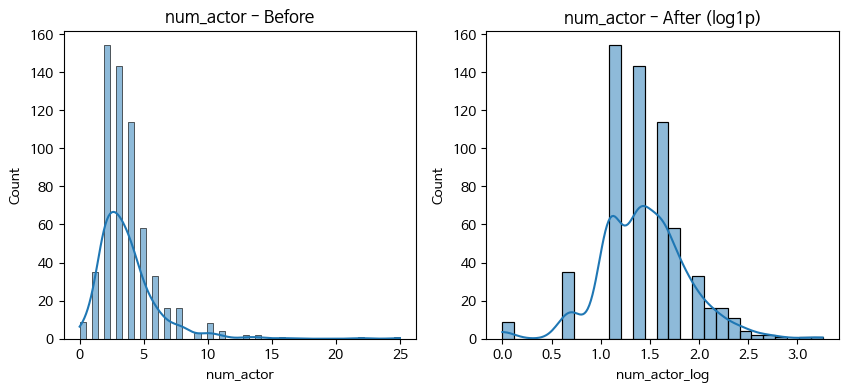

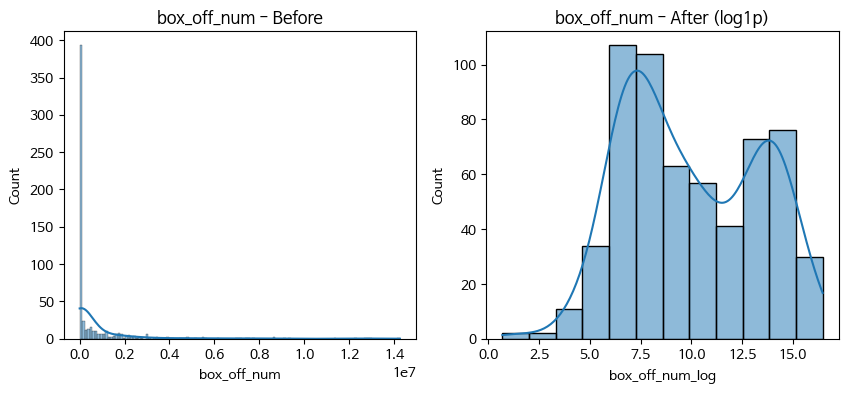

   time  dir_prev_bfnum_log  num_staff_log  num_actor_log  box_off_num_log  \
0    96            0.000000       4.521789       1.098612        10.060449   
1   130           13.965312       5.961005       1.386294        15.771725   
2   123           12.304905       5.840642       1.609438        15.755558   
3   101           10.081425       3.044522       1.945910        12.291640   
4   108            0.693147       5.529429       1.098612        13.088575   

   is_rookie_director  genre_SF  genre_공포  genre_느와르  genre_다큐멘터리  ...  \
0                   1     False     False      False        False  ...   
1                   0     False     False       True        False  ...   
2                   0     False     False      False        False  ...   
3                   0     False     False      False        False  ...   
4                   0     False     False      False        False  ...   

   month_9  month_10  month_11  month_12  weekday_0  weekday_1  weekday_2  \
0    Fals

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/drive/MyDrive/Colab/ESAA/movies_train.csv')

#결측치 처리
train['dir_prev_bfnum'].fillna(0, inplace=True)

#날짜 처리
train['release_time'] = pd.to_datetime(train['release_time'])
train['year'] = train['release_time'].dt.year
train['month'] = train['release_time'].dt.month
train['weekday'] = train['release_time'].dt.day_of_week

#로그 변환
cols_to_transform = ['dir_prev_bfnum', 'num_staff', 'num_actor', 'box_off_num']

for col in cols_to_transform:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(train[col], ax=ax[0], kde=True)
    ax[0].set_title(f"{col} - Before")

    train[col + "_log"] = np.log1p(train[col])

    sns.histplot(train[col + "_log"], ax=ax[1], kde=True)
    ax[1].set_title(f"{col} - After (log1p)")

    plt.show()

#신인 감독 여부 파생 변수
train['is_rookie_director'] = (train['dir_prev_bfnum_log'] == 0).astype(int)

#제거할 원본 변수들
cols_to_drop = [
    'title', 'director', 'release_time',
    'box_off_num', 'distributor', # 쉼표 추가
    'num_actor', 'num_staff', 'dir_prev_bfnum',
]

train = train.drop(columns=cols_to_drop)

train = train.drop(columns=['dir_prev_num'])


# One-Hot Encoding
cols_to_ohe = ['genre', 'screening_rat', 'year', 'month', 'weekday']
train = pd.get_dummies(train, columns=cols_to_ohe)

# 결과 확인
print(train.head())
print("train shape:", train.shape)

## 2. test

In [4]:
test = pd.read_csv('/content/drive/MyDrive/Colab/ESAA/movies_test.csv')

test['dir_prev_bfnum'].fillna(0, inplace=True)

test['release_time'] = pd.to_datetime(test['release_time'])
test['year'] = test['release_time'].dt.year
test['month'] = test['release_time'].dt.month
test['weekday'] = test['release_time'].dt.day_of_week

cols_to_transform = ['dir_prev_bfnum', 'num_staff', 'num_actor']

for col in cols_to_transform:
    test[col + "_log"] = np.log1p(test[col])

test['is_rookie_director'] = (test['dir_prev_bfnum_log'] == 0).astype(int)

cols_to_drop = [
    'title', 'director', 'release_time', 'distributor',
    'num_actor', 'num_staff', 'dir_prev_bfnum',
]

test = test.drop(columns=cols_to_drop)

test = test.drop(columns=['dir_prev_num'])

cols_to_ohe = ['genre', 'screening_rat', 'year', 'month', 'weekday']
test = pd.get_dummies(test, columns=cols_to_ohe)

In [5]:
row=test[test['time']==2015].iloc[0]
genre_cols=[c for c in test.columns if c.startswith('genre_')]
genre_list=[c.replace('genre_','') for c in genre_cols if row[c] ==1 or row[c] ==True]
ani_mean_time=train.loc[train['genre_애니메이션']==1,'time'].mean()
print(ani_mean_time)
ani_mean_time=round(ani_mean_time)

82.57142857142857


In [6]:
# ani_mean_time 값을 'row'의 'time' 컬럼에 할당 (이미 이전 셀에서 수행됨)
# 이 셀은 할당이 잘 되었는지 확인하기 위함입니다.
row['time'] = ani_mean_time

print(f"'time' in 'row' Series after assignment: {row['time']}")

'time' in 'row' Series after assignment: 83


# 회귀 모델

## 1. 성능 평가 방법

In [7]:
from sklearn.model_selection import train_test_split

y_target=train['box_off_num_log']
X_features=train.drop(columns=['box_off_num_log'],axis=1,inplace=False)
# X_features에 distributor One-Hot Encoding이 적용된 후 다시 train_test_split 수행
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=0)

In [8]:
from sklearn.model_selection import cross_val_score

def get_model_cv_prediction(model,X_data,y_target):
  neg_mse_scores=cross_val_score(model,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
  rmse_scores=np.sqrt(-1*neg_mse_scores)
  avg_rmse=np.mean(rmse_scores)
  print('##### ',model.__class__.__name__,' #####')
  print('5 교차 검증의 평균 RMSE:{0:.3f}'.format(avg_rmse))

In [9]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model,params):
  grid_model=GridSearchCV(model,param_grid=params,
                          scoring='neg_mean_squared_error',cv=5)
  grid_model.fit(X_train,y_train)
  rmse=np.sqrt(-1*grid_model.best_score_)
  print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                           np.round(rmse,4),grid_model.best_params_))

## 2. 회귀 트리 모델 학습/예측/평가

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg=RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models=[dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
  get_model_cv_prediction(model,X_train,y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
get_model_cv_prediction(xgb_reg,X_train,y_train)

#####  XGBRegressor  #####
5 교차 검증의 평균 RMSE:2.049


### 회귀 트리 모델 5 교차 검증의 평균 RMSE

결정트리: 2.100

랜덤포레스트: 1.919

GBM: 2.200

XGB: 2.049

LGBM: 2.028

### 이후 아이디어

각각의 회귀 트리 모델을 하이퍼 파라미터 서치

## 3. 회귀 트리 최적 하이퍼 파라미터 찾기

### 결정트리 하이퍼 파라미터 튜닝

최적 alpha
- max_depth: 3
- min_samples_split: 2

평균 RMSE: 2.100 -> **2.0702**

In [ ]:
from sklearn.model_selection import GridSearchCV

# DecisionTreeRegressor에 맞는 하이퍼파라미터 설정
param_grid={'max_depth': [3, 4, 5, 6, 7],
            'min_samples_split': [2, 5, 10]}
print(param_grid)
# 이전에 정의된 dt_reg 모델 사용
grid_search=GridSearchCV(dt_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,refit=True)

{'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [2, 5, 10]}


In [ ]:
grid_search.fit(X_train,y_train)
print_best_params(dt_reg,param_grid)

DecisionTreeRegressor 5 CV 시 최적 평균 RMSE 값:2.0702, 최적 alpha:{'max_depth': 3, 'min_samples_split': 2}


### 랜덤포레스트 하이퍼 파라미터 튜닝

최적 alpha
- max_depth: 8
- min_samples_split: 6
- n_estimators: 1000

평균 RMSE: 1.921 -> 1.9213 **커진 것 같진 않고 거의 그대로인 듯!**

In [ ]:
from sklearn.model_selection import GridSearchCV

# RandomForestRegressor에 맞는 하이퍼파라미터 설정
param_grid={
    'n_estimators':[100,200,300,500,1000],
    'max_depth':[8,10,12],
    'min_samples_split':[2,4,6]
}
print(param_grid)
# 이전에 정의된 rf_reg 모델 사용
grid_search=GridSearchCV(rf_reg,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,refit=True)

{'n_estimators': [100, 200, 300, 500, 1000], 'max_depth': [8, 10, 12], 'min_samples_split': [2, 4, 6]}


In [ ]:
grid_search.fit(X_train,y_train)
print_best_params(rf_reg,param_grid)

KeyboardInterrupt: 

### GBM 하이퍼 파라미터 튜닝

최적 alpha
- learning_rate: 0.05
- max_depth: 3
- n_estimators: 100

평균 RMSE: 2.189 -> **1.9503**

In [ ]:
from sklearn.model_selection import GridSearchCV

# GBM에 맞는 하이퍼 파라미터 설정
param_grid={
    'n_estimators':[100,200,300,500,1000],
    'learning_rate':[0.05,0.1,0.15],
    'max_depth':[3,5,7]
}
print(param_grid)
# 이전에 정의된 gb_reg 모델 사용
grid_search=GridSearchCV(gb_reg,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,refit=True)

{'n_estimators': [100, 200, 300, 500, 1000], 'learning_rate': [0.05, 0.1, 0.15], 'max_depth': [3, 5, 7]}


In [ ]:
grid_search.fit(X_train,y_train)
print_best_params(gb_reg,param_grid)

GradientBoostingRegressor 5 CV 시 최적 평균 RMSE 값:1.9503, 최적 alpha:{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


### XGBoost 하이퍼 파라미터 튜닝

최적 alpha
- colsample_bytree: 0.5
- learning_rate: 0.05
- max_depth: 3
- n_estimators: 100
- subsample: 0.5

평균 RMSE: 2.049 -> **1.8677**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# XGB에 맞는 하이퍼 파라미터 설정
param_grid={
    'n_estimators':[100,200,300,500,1000],
    'learning_rate':[0.05,0.1,0.15],
    'max_depth':[3,5,7],
    'colsample_bytree':[0.5,0.7,0.9],
    'subsample':[0.5,0.7,0.9]
}
print(param_grid)
# 이전에 정의된 xgb_reg 모델 사용
grid_search=GridSearchCV(xgb_reg,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,refit=True)

{'n_estimators': [100, 200, 300, 500, 1000], 'learning_rate': [0.05, 0.1, 0.15], 'max_depth': [3, 5, 7], 'colsample_bytree': [0.5, 0.7, 0.9], 'subsample': [0.5, 0.7, 0.9]}


In [ ]:
grid_search.fit(X_train,y_train)
print_best_params(xgb_reg,param_grid)

XGBRegressor 5 CV 시 최적 평균 RMSE 값:1.8677, 최적 alpha:{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}


### LightGBM 하이퍼 파라미터 튜닝

최적 alpha
- colsample_bytree: 0.7
- learning_rate: 0.15
- max_depth: 3
- n_estimators: 100
- num_leaves: 32
- subsample: 0.6

평균 RMSE: 2.028 -> **1.8907**

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# LGBM에 맞는 하이퍼 파라미터 설정
param_grid={
    'n_estimators':[100,200,300,500,1000],
    'learning_rate':[0.05,0.1,0.15],
    'num_leaves':[32,64,128],
    'max_depth':[-1,3,5,7],
    'colsample_bytree':[0.6,0.7,0.8],
    'subsample':[0.6,0.7,0.8]
}
print(param_grid)
# 이전에 정의된 lgb_reg 모델 사용
grid_search=GridSearchCV(lgb_reg,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,refit=True)

{'n_estimators': [100, 200, 300, 500, 1000], 'learning_rate': [0.05, 0.1, 0.15], 'num_leaves': [32, 64, 128], 'max_depth': [-1, 3, 5, 7], 'colsample_bytree': [0.6, 0.7, 0.8], 'subsample': [0.6, 0.7, 0.8]}


In [ ]:
grid_search.fit(X_train,y_train)
print_best_params(lgb_reg,param_grid)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### 파라미터 튜닝 후 회귀 트리 모델 5 교차 검증의 평균 RMSE

결정트리: 2.096 -> **2.0702**

랜덤포레스트: 1.921 -> **1.9213**

GBM: 2.189 -> **1.9503**

XGB: 2.049 -> **1.8677**

LGBM: 2.028 -> **1.8907**

### 이후 아이디어

성능이 높은 것 2가지 XGB, LGBM만 하이퍼 파라미터 튜닝 추가로 진행

### XGBoost 추가 하이퍼 파라미터 튜닝

최적 alpha
- colsample_bytree: 0.5
- learning_rate: 0.05
- max_depth: 3
- n_estimators: 100
- subsample: 0.5

추가 alpha
- reg_alpha: 0.01
- reg_lambda: 1

평균 RMSE: 2.049 -> 1.8677 -> **1.8652**

In [ ]:
xgb_reg=XGBRegressor(n_estimators=1000)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# XGB에 맞는 하이퍼 파라미터 설정
param_grid={
    'n_estimators':[100],
    'learning_rate':[0.05],
    'max_depth':[3],
    'colsample_bytree':[0.5],
    'subsample':[0.5],
    'reg_alpha':[0, 0.01, 0.1, 1],
    'reg_lambda':[0, 0.01, 0.1, 1]
}
print(param_grid)
# 이전에 정의된 xgb_reg 모델 사용
grid_search=GridSearchCV(xgb_reg,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,refit=True)

{'n_estimators': [100], 'learning_rate': [0.05], 'max_depth': [3], 'colsample_bytree': [0.5], 'subsample': [0.5], 'reg_alpha': [0, 0.01, 0.1, 1], 'reg_lambda': [0, 0.01, 0.1, 1]}


### LightGBM 추가 하이퍼 파라미터 튜닝

최적 alpha
- colsample_bytree: 0.7
- learning_rate: 0.15
- max_depth: 3
- n_estimators: 100
- num_leaves: 32
- subsample: 0.6

추가 alpha
- reg_alpha: 0.01
- reg_lambda: 0.1

평균 RMSE: 2.028 -> 1.8907 -> **1.8823**

In [ ]:
from lightgbm import LGBMRegressor
lgb_reg=LGBMRegressor(n_estimators=1000)

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
import lightgbm as lgb

# XGB에 맞는 하이퍼 파라미터 설정
param_grid={
    'n_estimators':[100],
    'learning_rate':[0.05],
    'max_depth':[3],
    'colsample_bytree':[0.5],
    'subsample':[0.5],
    'reg_alpha':[0, 0.01, 0.1, 1, 10],
    'reg_lambda':[0, 0.01, 0.1, 1, 10]
}
print(param_grid)
# 이전에 정의된 xgb_reg 모델 사용
grid_search=GridSearchCV(xgb_reg,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,refit=True)

{'n_estimators': [100], 'learning_rate': [0.05], 'max_depth': [3], 'colsample_bytree': [0.5], 'subsample': [0.5], 'reg_alpha': [0, 0.01, 0.1, 1, 10], 'reg_lambda': [0, 0.01, 0.1, 1, 10]}


In [ ]:
grid_search.fit(X_train,y_train)
print_best_params(lgb_reg,param_grid)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### 이후 아이디어

XGBoost와 LightGBM의 예측 결과 구해서 합친 뒤 리더보드 점수 확인.

## XGBoost와 LightGBM 혼합 예측

In [11]:
from sklearn.metrics import mean_squared_error # Add this line

def get_rmse_pred(preds):
  for key in preds.keys():
    pred_value=preds[key]
    mse=mean_squared_error(y_test,pred_value)
    rmse=np.sqrt(mse) # rmsle
    print('{0} 모델의 RMSLE: {1:.3f}'.format(key,rmse))

### 개별 모델 학습과 예측

#### XGBoost 개별 모델

In [12]:
# xgb
xgb_reg=XGBRegressor(n_estimators=100,
                     colsample_bytree=0.5,
                     learning_rate=0.05,
                     max_depth=3,
                     subsample=0.5,
                     reg_alpha=0.01,
                     reg_lambda=1)
xgb_reg.fit(X_train,y_train)
xgb_pred=xgb_reg.predict(X_test)
print(xgb_pred)

[15.981806  14.672373   8.015355   7.462418  10.070046   7.832115
  6.6977696  7.89016    6.767363   7.7121544  8.385919  13.602525
  7.0584006  6.5797796 14.280056   7.781036   7.5763435  7.328433
  6.068544   9.192199   8.439316   8.437311  13.244463   6.151074
 15.213246  10.130729  10.283628   7.5523887 13.691459   7.644834
 11.462885  12.993454  11.504052   9.0271     8.594633   9.458583
 11.0611725  7.890346  11.093885  13.91669   10.144916  10.910234
 15.174011  11.244785   7.8193207  8.656287   8.461251  10.164243
  9.286359   7.45434    7.6224146 10.195623   9.894048  13.57032
  8.3427305  9.856866   7.527021  13.248596   7.7543187  7.476592
  7.085798   8.982127   8.58448    8.435074   8.459106   7.2634687
  5.7073326 10.67366    6.87155    8.965402   7.0776896 14.516484
 13.328984  15.31914    7.130191   7.1990075 14.207193  10.894656
  6.9717684 11.846228   7.200326   9.770469  10.347559  13.62965
  7.7138367  9.886551   8.238725  13.082805  11.0419035 13.533248
  9.011398 

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

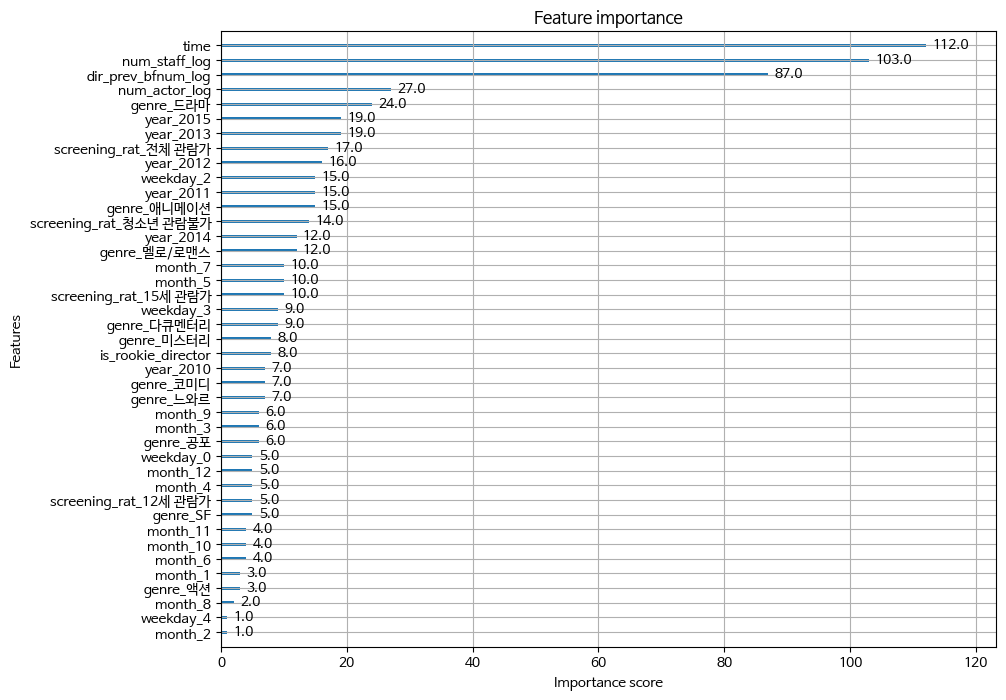

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_reg,ax=ax)

#### LGBM 개별 모델

In [14]:
# lgb
lgb_reg=LGBMRegressor(n_estimators=100,
                      colsample_bytree=0.7,
                      learning_rate=0.15,
                      max_depth=3,
                      num_leaves=32,
                      subsample=0.6,
                      reg_alpha=0.01,
                      reg_lambda=0.1)
lgb_reg.fit(X_train,y_train)
lgb_pred=lgb_reg.predict(X_test)
print(lgb_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 36
[LightGBM] [Info] Start training from score 10.088930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

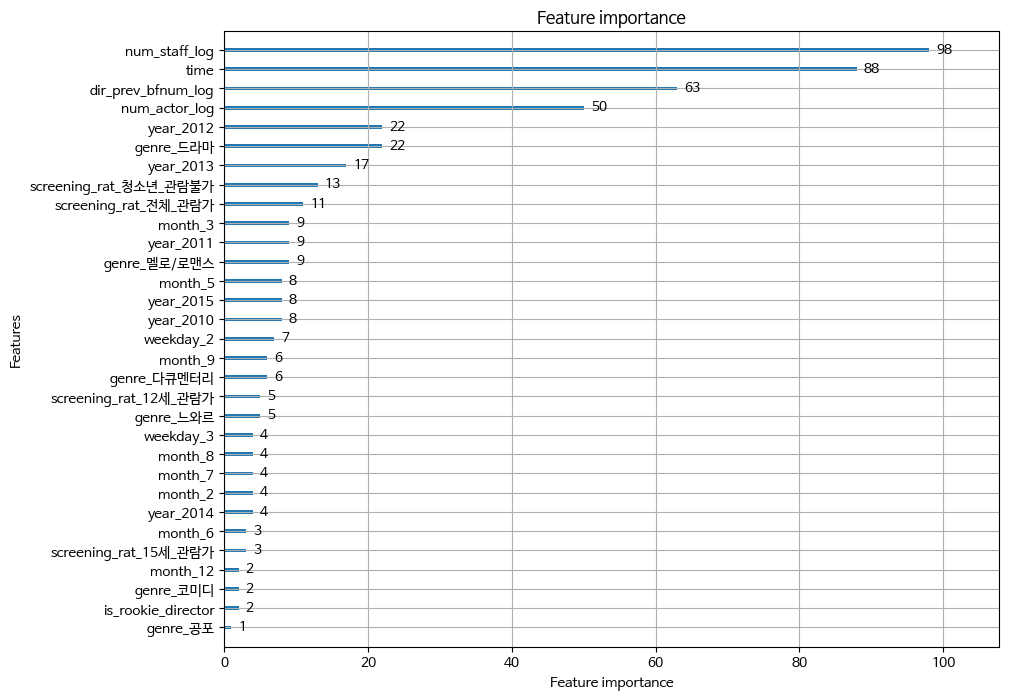

In [15]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(1,1,figsize=(10,8))
plot_importance(lgb_reg,ax=ax)

### 혼합 모델 예측

In [16]:
# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred=0.7*xgb_pred+0.3*lgb_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSLE: 2.036
xgb 모델의 RMSLE: 2.046
lgb 모델의 RMSLE: 2.067


In [17]:
# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred=0.6*xgb_pred+0.4*lgb_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSLE: 2.035
xgb 모델의 RMSLE: 2.046
lgb 모델의 RMSLE: 2.067


In [18]:
# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred=0.64*xgb_pred+0.36*lgb_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSLE: 2.035
xgb 모델의 RMSLE: 2.046
lgb 모델의 RMSLE: 2.067


### 이후 아이디어

XGBoost 모델로 제출 시 리더보드 점수: 1480491.62514

혼합 모델 예측 성능이 좋아졌다..? -> 리더보드 제출

XGBoost 모델 + LGBM 모델 혼합 모델 리더보드 점수: 	1396244.9971188647 (0.6:0.4)

XGBoost 모델 + LGBM 모델 혼합 모델 리더보드 점수: 1399478.321126157	(0.64:0.36)

### 혼합 모델 리더보드 제출

#### 0.6 0.4 파일

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso, Ridge

# 1. 원본 테스트 데이터 로드 (title을 얻기 위함)
original_test_df = pd.read_csv('/content/drive/MyDrive/Colab/ESAA/movies_test.csv')

# 2. 테스트 데이터 전처리 (train 데이터와 동일하게, 'distributor'는 제외)
test_processed = original_test_df.copy()

# 결측치 처리
test_processed['dir_prev_bfnum'].fillna(0, inplace=True)

# 날짜 처리
test_processed['release_time'] = pd.to_datetime(test_processed['release_time'])
test_processed['year'] = test_processed['release_time'].dt.year
test_processed['month'] = test_processed['release_time'].dt.month
test_processed['weekday'] = test_processed['release_time'].dt.day_of_week

# 로그 변환
cols_to_transform_test = ['dir_prev_bfnum', 'num_staff', 'num_actor']
for col in cols_to_transform_test:
    test_processed[col + "_log"] = np.log1p(test_processed[col])

# 신인 감독 여부 파생 변수
test_processed['is_rookie_director'] = (test_processed['dir_prev_bfnum_log'] == 0).astype(int)

# 제거할 원본 변수들 (train의 X_features 생성 시 제거된 컬럼과 동일하게)
cols_to_drop_test = [
    'title', 'director', 'release_time',
    'distributor',
    'num_actor', 'num_staff', 'dir_prev_bfnum',
    'dir_prev_num'
]
test_processed = test_processed.drop(columns=cols_to_drop_test)

# time==2015인 행의 time을 ani_mean_time으로 대체하는 전처리 추가
# ani_mean_time은 이전 셀에서 83으로 계산됨
ani_mean_time = 83 # Use the pre-calculated and rounded value
test_processed.loc[test_processed['time'] == 2015, 'time'] = ani_mean_time

# One-Hot Encoding (distributor는 이미 드롭되었으므로 포함하지 않습니다.)
cols_to_ohe_test = ['genre', 'screening_rat', 'year', 'month', 'weekday']
test_processed = pd.get_dummies(test_processed, columns=cols_to_ohe_test)

# 3. 훈련 데이터와 테스트 데이터 컬럼 일치시키기
# X_features는 전처리된 훈련 데이터의 피처들입니다.
# test_processed의 컬럼을 X_features의 컬럼에 맞춤

# X_features의 모든 컬럼이 test_processed에 있는지 확인하고, 없으면 0으로 채움
missing_cols_in_test = set(X_features.columns) - set(test_processed.columns)
for c in missing_cols_in_test:
    test_processed[c] = 0

# test_processed에만 있는 컬럼을 제거 (X_features에 없는 컬럼)
extra_cols_in_test = set(test_processed.columns) - set(X_features.columns)
if extra_cols_in_test:
    test_processed = test_processed.drop(columns=list(extra_cols_in_test))

# 컬럼 순서 일치
test_aligned = test_processed[X_features.columns]

print("Test data aligned shape:", test_aligned.shape)
print("Test data aligned head:\n", test_aligned.head())

# 4. 최종 XGBoost 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_xgb_model = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    subsample=0.5,
    reg_alpha=0.01,
    reg_lambda=1,
    random_state=0,
    n_jobs=-1
)
final_xgb_model.fit(X_features, y_target)
xgb_test_pred = final_xgb_model.predict(test_aligned)

# 5. 최종 LightGBM 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_lgb_model = LGBMRegressor(
    colsample_bytree=0.7,
    learning_rate=0.15,
    max_depth=3,
    n_estimators=100,
    num_leaves=32,
    subsample=0.6,
    reg_alpha=0.01,
    reg_lambda=0.1,
    random_state=0,
    n_jobs=-1
)
final_lgb_model.fit(X_features, y_target)
lgb_test_pred = final_lgb_model.predict(test_aligned)

# 6. 최종 Ridge 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_ridge_model = Ridge(alpha=10, random_state=0)
final_ridge_model.fit(X_features, y_target)
ridge_test_pred = final_ridge_model.predict(test_aligned)

# 7. 최종 Lasso 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_lasso_model = Lasso(alpha=0.01, random_state=0)
final_lasso_model.fit(X_features, y_target)
lasso_test_pred = final_lasso_model.predict(test_aligned)

# 8. 예측값 혼합 (지정된 가중치: XGBoost 0.6, LightGBM 0.4, Ridge 0.00, Lasso 0.00)
ensemble_predictions_log = (0.6 * xgb_test_pred) + (0.4 * lgb_test_pred)

# 9. 로그 역변환 (expm1)
ensemble_predictions = np.expm1(ensemble_predictions_log)

# 10. submission 파일 생성
submission = pd.DataFrame({'title': original_test_df['title'], 'box_off_num': ensemble_predictions})

# 11. submission.csv 파일로 저장
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' has been created with custom weights.")
print(submission.head())

Test data aligned shape: (243, 45)
Test data aligned head:
    time  dir_prev_bfnum_log  num_staff_log  num_actor_log  is_rookie_director  \
0   125           12.613303       5.720312       1.386294                   0   
1   113           12.744614       5.620401       1.386294                   0   
2   115           15.252168       6.040255       2.079442                   0   
3   116           13.446391       6.013715       1.098612                   0   
4   110           10.365301       5.942799       0.693147                   0   

   genre_SF  genre_공포  genre_느와르  genre_다큐멘터리  genre_드라마  ...  month_9  \
0     False     False       True        False      False  ...    False   
1     False     False      False        False      False  ...    False   
2     False     False      False        False       True  ...    False   
3     False     False      False        False      False  ...    False   
4     False      True      False        False      False  ...    False   

   month

#### 0.64 0.36 파일

In [21]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 1. 원본 테스트 데이터 로드 (title을 얻기 위함)
original_test_df = pd.read_csv('/content/drive/MyDrive/Colab/ESAA/movies_test.csv')

# 2. 테스트 데이터 전처리 (train 데이터와 동일하게, 'distributor'는 제외)
test_processed = original_test_df.copy()

# 결측치 처리
test_processed['dir_prev_bfnum'].fillna(0, inplace=True)

# 날짜 처리
test_processed['release_time'] = pd.to_datetime(test_processed['release_time'])
test_processed['year'] = test_processed['release_time'].dt.year
test_processed['month'] = test_processed['release_time'].dt.month
test_processed['weekday'] = test_processed['release_time'].dt.day_of_week

# 로그 변환
cols_to_transform_test = ['dir_prev_bfnum', 'num_staff', 'num_actor']
for col in cols_to_transform_test:
    test_processed[col + "_log"] = np.log1p(test_processed[col])

# 신인 감독 여부 파생 변수
test_processed['is_rookie_director'] = (test_processed['dir_prev_bfnum_log'] == 0).astype(int)

# time==2015인 행의 time을 ani_mean_time으로 대체하는 전처리 추가
# ani_mean_time은 이전 셀에서 83으로 계산됨
ani_mean_time = 83 # Use the pre-calculated and rounded value
test_processed.loc[test_processed['time'] == 2015, 'time'] = ani_mean_time

# 제거할 원본 변수들 (train의 X_features 생성 시 제거된 컬럼과 동일하게)
cols_to_drop_test = [
    'title', 'director', 'release_time',
    'distributor', # distributor 컬럼은 X_features에 포함되지 않으므로 여기서 드롭합니다.
    'num_actor', 'num_staff', 'dir_prev_bfnum',
    'dir_prev_num' # 이 컬럼도 X_features 생성 시 드롭됨
]
test_processed = test_processed.drop(columns=cols_to_drop_test)

# One-Hot Encoding (distributor는 이미 드롭되었으므로 포함하지 않습니다.)
cols_to_ohe_test = ['genre', 'screening_rat', 'year', 'month', 'weekday']
test_processed = pd.get_dummies(test_processed, columns=cols_to_ohe_test)

# 3. 훈련 데이터와 테스트 데이터 컬럼 일치시키기
# X_features는 전처리된 훈련 데이터의 피처들입니다.
# test_processed의 컬럼을 X_features의 컬럼에 맞춤

# X_features의 모든 컬럼이 test_processed에 있는지 확인하고, 없으면 0으로 채움
missing_cols_in_test = set(X_features.columns) - set(test_processed.columns)
for c in missing_cols_in_test:
    test_processed[c] = 0

# test_processed에만 있는 컬럼을 제거 (X_features에 없는 컬럼)
extra_cols_in_test = set(test_processed.columns) - set(X_features.columns)
if extra_cols_in_test:
    test_processed = test_processed.drop(columns=list(extra_cols_in_test))

# 컬럼 순서 일치
test_aligned = test_processed[X_features.columns]

print("Test data aligned shape:", test_aligned.shape)
print("Test data aligned head:\n", test_aligned.head())

# 4. 최종 XGBoost 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_xgb_model = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    subsample=0.5,
    reg_alpha=0.01,
    reg_lambda=1,
    random_state=0,
    n_jobs=-1
)
final_xgb_model.fit(X_features, y_target)
xgb_test_pred = final_xgb_model.predict(test_aligned)

# 5. 최종 LightGBM 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_lgb_model = LGBMRegressor(
    colsample_bytree=0.7,
    learning_rate=0.15,
    max_depth=3,
    n_estimators=100,
    num_leaves=32,
    subsample=0.6,
    reg_alpha=0.01,
    reg_lambda=0.1,
    random_state=0,
    n_jobs=-1
)
final_lgb_model.fit(X_features, y_target)
lgb_test_pred = final_lgb_model.predict(test_aligned)

# 6. 예측값 혼합 (가중치 0.64 : 0.36)
ensemble_predictions_log = 0.64 * xgb_test_pred + 0.36 * lgb_test_pred

# 7. 로그 역변환 (expm1)
ensemble_predictions = np.expm1(ensemble_predictions_log)

# 8. submission 파일 생성
submission = pd.DataFrame({'title': original_test_df['title'], 'box_off_num': ensemble_predictions})

# 9. submission.csv 파일로 저장
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' has been created.")
print(submission.head())

Test data aligned shape: (243, 45)
Test data aligned head:
    time  dir_prev_bfnum_log  num_staff_log  num_actor_log  is_rookie_director  \
0   125           12.613303       5.720312       1.386294                   0   
1   113           12.744614       5.620401       1.386294                   0   
2   115           15.252168       6.040255       2.079442                   0   
3   116           13.446391       6.013715       1.098612                   0   
4   110           10.365301       5.942799       0.693147                   0   

   genre_SF  genre_공포  genre_느와르  genre_다큐멘터리  genre_드라마  ...  month_9  \
0     False     False       True        False      False  ...    False   
1     False     False      False        False      False  ...    False   
2     False     False      False        False       True  ...    False   
3     False     False      False        False      False  ...    False   
4     False      True      False        False      False  ...    False   

   month

## ridge 회귀와 lasso 회귀와 elasticnet 회귀 혼합 모델

### ridge, lasso, elasticnet 가져오기

In [22]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

In [23]:
### alpha 값 변화에 따른 결과 출력 함수 for Ridge & Lasso & ElasticNet ###

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
  coeff_df = pd.DataFrame()
  if verbose: print('######', model_name, '######')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n,
                                     y_target_n, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

    model.fit(X_data_n, y_target_n)
    if return_coeff:
      # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
      coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
      colname = 'alpha:'+str(param)
      coeff_df[colname] = coeff

  return coeff_df
# end of get_linear_regre_eval

In [24]:
ridge_alphas = [0.07, 0.1, 1, 10, 100]
coeff_lasso_df = get_linear_reg_eval('Ridge', params=ridge_alphas, X_data_n = X_train, y_target_n = y_train)

###### Ridge ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 2.110
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 2.109
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.092
alpha 10일 때 5 폴드 세트의 평균 RMSE: 2.066
alpha 100일 때 5 폴드 세트의 평균 RMSE: 2.117


In [26]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X_train, y_target_n = y_train)

###### Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 2.104
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 2.127
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 2.302
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.378
alpha 3일 때 5 폴드 세트의 평균 RMSE: 2.492


In [27]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n = X_train, y_target_n = y_train)

###### ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 2.092
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 2.115
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 2.294
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.339
alpha 3일 때 5 폴드 세트의 평균 RMSE: 2.470


#### ridge, lasso, elasticnet 각각 시각화

In [28]:
def get_rmse(model):
  pred=model.predict(X_test)
  mse=mean_squared_error(y_test,pred)
  rmse=np.sqrt(mse)
  print(model.__class__.__name__,'로그 변환된 RMSE:',np.round(rmse,3))
  return rmse

def get_rmses(models):
  rmses=[]
  for model in models:
    rmse=get_rmse(model)
    rmses.append(rmse)
  return rmses

In [29]:
def get_top_bottom_coef(model,n=10):
  coef=pd.Series(data=model.coef_,index=X_train.columns)
  coef_high=coef.sort_values(ascending=False).head(n)
  coef_low=coef.sort_values(ascending=False).tail(n)
  return coef_high,coef_low

In [30]:
def visualize_coefficients(models):
  fig,axs=plt.subplots(figsize=(24,10),nrows=1,ncols=3)
  fig.tight_layout()

  for i_num,model in enumerate(models):
    coef_high,coef_low=get_top_bottom_coef(model)
    coef_concat=pd.concat([coef_high,coef_low])
    axs[i_num].set_title(model.__class__.__name__+' Coefficients',size=25)
    axs[i_num].tick_params(axis='y',direction="in",pad=-120)
    for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()): # Corrected typo here
      label.set_fontsize(22)
    sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])

Ridge 로그 변환된 RMSE: 2.302
Lasso 로그 변환된 RMSE: 2.362
ElasticNet 로그 변환된 RMSE: 2.353


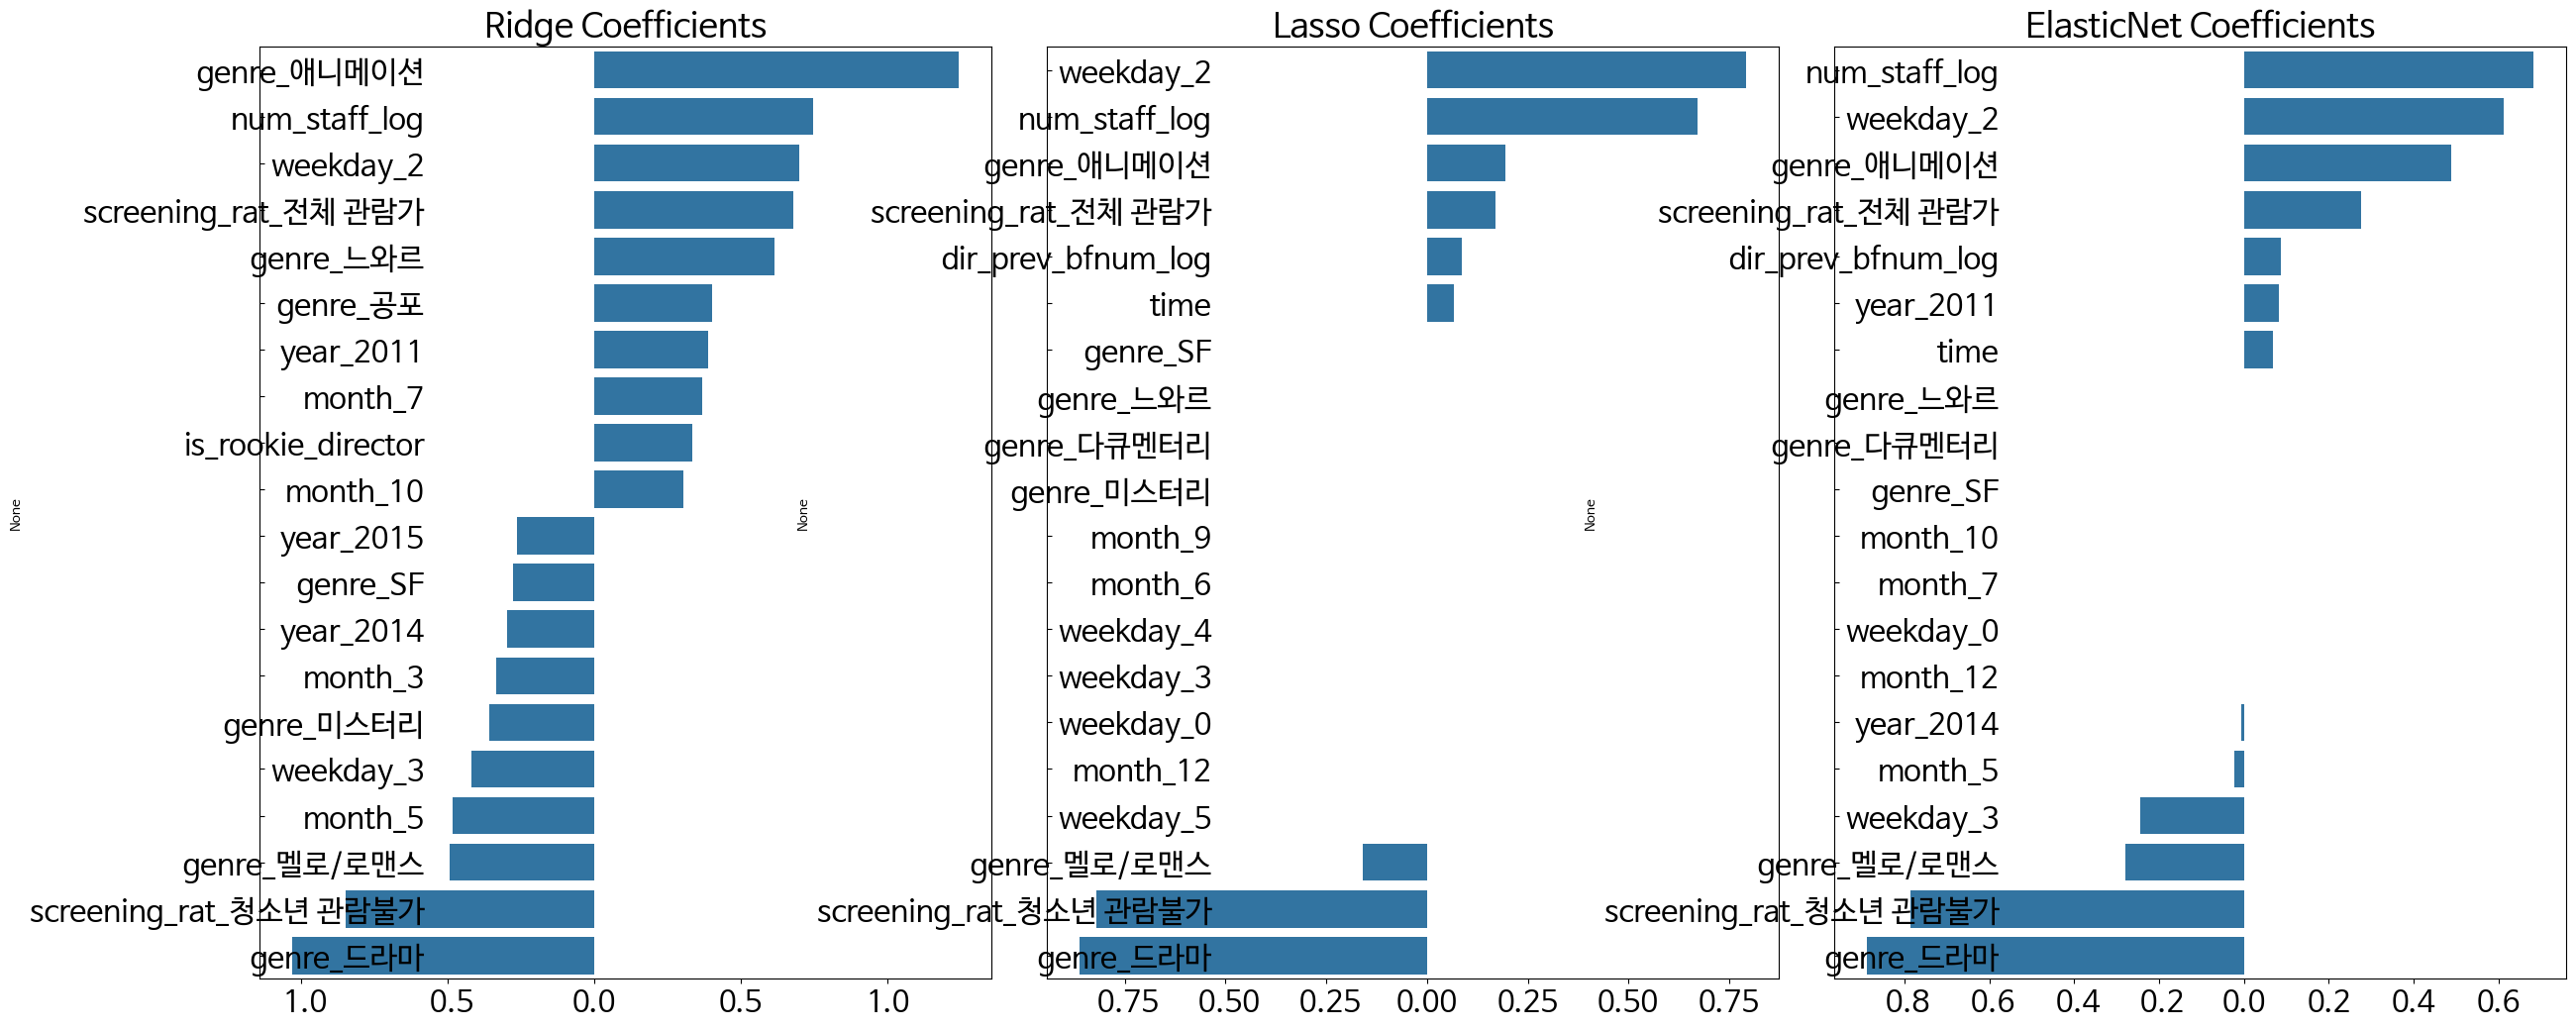

In [31]:
ridge_reg=Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.07)
lasso_reg.fit(X_train,y_train)
elastic_reg=ElasticNet(alpha=0.07,l1_ratio=0.7)
elastic_reg.fit(X_train,y_train)

# 모든 모델의 RMSE 출력
models=[ridge_reg,lasso_reg,elastic_reg]
get_rmses(models)

# 모든 모델의 회귀계수 시각화
models=[ridge_reg,lasso_reg,elastic_reg]
visualize_coefficients(models)

In [32]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model,params):
  grid_model=GridSearchCV(model,param_grid=params,
                          scoring='neg_mean_squared_error',cv=5)
  grid_model.fit(X_train,y_train)
  rmse=np.sqrt(-1*grid_model.best_score_)
  print('{0} 5 CV 시 최적 평균 RMSE 값: {1},최적 alpha:{2}'.format(model.__class__.__name__,
                                                           np.round(rmse,4),grid_model.best_params_))
ridge_params={'alpha':[0.001,0.01,0.07,0.1,1,10,100]}
lasso_params={'alpha':[0.001,0.01,0.07,0.1,0.5,1,3]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 2.0692,최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 2.0773,최적 alpha:{'alpha': 0.01}


### XGBoost와 LightGBM과 ridge과 lasso 앙상블

In [33]:
def get_rmse_pred(preds):
  for key in preds.keys():
    pred_value=preds[key]
    mse=mean_squared_error(y_test,pred_value)
    rmse=np.sqrt(mse)
    print('{0} 모델의 RMSE:{1}'.format(key,rmse))

# 개별 모델 학습
xgb_reg=XGBRegressor(n_estimators=100,
                     colsample_bytree=0.5,
                     learning_rate=0.05,
                     max_depth=3,
                     subsample=0.5,
                     reg_alpha=0.01,
                     reg_lambda=1)
xgb_reg.fit(X_train,y_train)
xgb_pred=xgb_reg.predict(X_test)

lgb_reg=LGBMRegressor(n_estimators=100,
                      colsample_bytree=0.7,
                      learning_rate=0.15,
                      max_depth=3,
                      num_leaves=32,
                      subsample=0.6,
                      reg_alpha=0.01,
                      reg_lambda=0.1)
lgb_reg.fit(X_train,y_train)
lgb_pred=lgb_reg.predict(X_test)
print(lgb_pred)
lgb_reg.fit(X_train,y_train)
lgb_reg.pred=lgb_reg.predict(X_test)

ridge_reg=Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)
ridge_pred=ridge_reg.predict(X_test)

lasso_reg=Lasso(alpha=0.01)
lasso_reg.fit(X_train,y_train)
lasso_pred=lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred=0.4*xgb_pred+0.4*lgb_pred+0.2*ridge_pred+0.2*lasso_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred,
       'ridge':ridge_pred,
       'lasso':lasso_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 36
[LightGBM] [Info] Start training from score 10.088930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [34]:
pred=0.5*xgb_pred+0.3*lgb_pred+0.1*ridge_pred+0.1*lasso_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred,
       'ridge':ridge_pred,
       'lasso':lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE:2.0458369591225893
xgb 모델의 RMSE:2.0457119625645994
lgb 모델의 RMSE:2.0673762547130377
ridge 모델의 RMSE:2.3022030015690205
lasso 모델의 RMSE:2.298862437762662


In [35]:
pred=0.6*xgb_pred+0.3*lgb_pred+0.05*ridge_pred+0.05*lasso_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred,
       'ridge':ridge_pred,
       'lasso':lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE:2.0379966215068674
xgb 모델의 RMSE:2.0457119625645994
lgb 모델의 RMSE:2.0673762547130377
ridge 모델의 RMSE:2.3022030015690205
lasso 모델의 RMSE:2.298862437762662


In [36]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso, Ridge

# 1. 원본 테스트 데이터 로드 (title을 얻기 위함)
original_test_df = pd.read_csv('/content/drive/MyDrive/Colab/ESAA/movies_test.csv')

# 2. 테스트 데이터 전처리 (train 데이터와 동일하게, 'distributor'는 제외)
test_processed = original_test_df.copy()

# 결측치 처리
test_processed['dir_prev_bfnum'].fillna(0, inplace=True)

# 날짜 처리
test_processed['release_time'] = pd.to_datetime(test_processed['release_time'])
test_processed['year'] = test_processed['release_time'].dt.year
test_processed['month'] = test_processed['release_time'].dt.month
test_processed['weekday'] = test_processed['release_time'].dt.day_of_week

# 로그 변환
cols_to_transform_test = ['dir_prev_bfnum', 'num_staff', 'num_actor']
for col in cols_to_transform_test:
    test_processed[col + "_log"] = np.log1p(test_processed[col])

# 신인 감독 여부 파생 변수
test_processed['is_rookie_director'] = (test_processed['dir_prev_bfnum_log'] == 0).astype(int)

# 제거할 원본 변수들 (train의 X_features 생성 시 제거된 컬럼과 동일하게)
cols_to_drop_test = [
    'title', 'director', 'release_time',
    'distributor',
    'num_actor', 'num_staff', 'dir_prev_bfnum',
    'dir_prev_num'
]
test_processed = test_processed.drop(columns=cols_to_drop_test)

# time==2015인 행의 time을 ani_mean_time으로 대체하는 전처리 추가
# ani_mean_time은 이전 셀에서 83으로 계산됨
ani_mean_time = 83 # Use the pre-calculated and rounded value
test_processed.loc[test_processed['time'] == 2015, 'time'] = ani_mean_time

# One-Hot Encoding (distributor는 이미 드롭되었으므로 포함하지 않습니다.)
cols_to_ohe_test = ['genre', 'screening_rat', 'year', 'month', 'weekday']
test_processed = pd.get_dummies(test_processed, columns=cols_to_ohe_test)

# 3. 훈련 데이터와 테스트 데이터 컬럼 일치시키기
# X_features는 전처리된 훈련 데이터의 피처들입니다.
# test_processed의 컬럼을 X_features의 컬럼에 맞춤

# X_features의 모든 컬럼이 test_processed에 있는지 확인하고, 없으면 0으로 채움
missing_cols_in_test = set(X_features.columns) - set(test_processed.columns)
for c in missing_cols_in_test:
    test_processed[c] = 0

# test_processed에만 있는 컬럼을 제거 (X_features에 없는 컬럼)
extra_cols_in_test = set(test_processed.columns) - set(X_features.columns)
if extra_cols_in_test:
    test_processed = test_processed.drop(columns=list(extra_cols_in_test))

# 컬럼 순서 일치
test_aligned = test_processed[X_features.columns]

print("Test data aligned shape:", test_aligned.shape)
print("Test data aligned head:\n", test_aligned.head())

# 4. 최종 XGBoost 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_xgb_model = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    subsample=0.5,
    reg_alpha=0.01,
    reg_lambda=1,
    random_state=0,
    n_jobs=-1
)
final_xgb_model.fit(X_features, y_target)
xgb_test_pred = final_xgb_model.predict(test_aligned)

# 5. 최종 LightGBM 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_lgb_model = LGBMRegressor(
    colsample_bytree=0.7,
    learning_rate=0.15,
    max_depth=3,
    n_estimators=100,
    num_leaves=32,
    subsample=0.6,
    reg_alpha=0.01,
    reg_lambda=0.1,
    random_state=0,
    n_jobs=-1
)
final_lgb_model.fit(X_features, y_target)
lgb_test_pred = final_lgb_model.predict(test_aligned)

# 6. 최종 Ridge 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_ridge_model = Ridge(alpha=10, random_state=0)
final_ridge_model.fit(X_features, y_target)
ridge_test_pred = final_ridge_model.predict(test_aligned)

# 7. 최종 Lasso 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_lasso_model = Lasso(alpha=0.01, random_state=0)
final_lasso_model.fit(X_features, y_target)
lasso_test_pred = final_lasso_model.predict(test_aligned)

# 8. 예측값 혼합 (지정된 가중치: XGBoost 0.6, LightGBM 0.3, Ridge 0.05, Lasso 0.05)
ensemble_predictions_log = (0.6 * xgb_test_pred) + (0.3 * lgb_test_pred) + (0.05 * ridge_test_pred) + (0.05 * lasso_test_pred)

# 9. 로그 역변환 (expm1)
ensemble_predictions = np.expm1(ensemble_predictions_log)

# 10. submission 파일 생성
submission = pd.DataFrame({'title': original_test_df['title'], 'box_off_num': ensemble_predictions})

# 11. submission.csv 파일로 저장
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' has been created with custom weights.")
print(submission.head())

Test data aligned shape: (243, 45)
Test data aligned head:
    time  dir_prev_bfnum_log  num_staff_log  num_actor_log  is_rookie_director  \
0   125           12.613303       5.720312       1.386294                   0   
1   113           12.744614       5.620401       1.386294                   0   
2   115           15.252168       6.040255       2.079442                   0   
3   116           13.446391       6.013715       1.098612                   0   
4   110           10.365301       5.942799       0.693147                   0   

   genre_SF  genre_공포  genre_느와르  genre_다큐멘터리  genre_드라마  ...  month_9  \
0     False     False       True        False      False  ...    False   
1     False     False      False        False      False  ...    False   
2     False     False      False        False       True  ...    False   
3     False     False      False        False      False  ...    False   
4     False      True      False        False      False  ...    False   

   month

In [32]:
pred=0.7*xgb_pred+0.2*lgb_pred+0.05*ridge_pred+0.05*lasso_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred,
       'ridge':ridge_pred,
       'lasso':lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE:2.0397156950933026
xgb 모델의 RMSE:2.0457119625645994
lgb 모델의 RMSE:2.0673762547130377
ridge 모델의 RMSE:2.3022030015690205
lasso 모델의 RMSE:2.298862437762662


In [33]:
pred=0.65*xgb_pred+0.3*lgb_pred+0.05*ridge_pred+0.00*lasso_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred,
       'ridge':ridge_pred,
       'lasso':lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE:2.0361807816573556
xgb 모델의 RMSE:2.0457119625645994
lgb 모델의 RMSE:2.0673762547130377
ridge 모델의 RMSE:2.3022030015690205
lasso 모델의 RMSE:2.298862437762662


In [34]:
pred=0.6*xgb_pred+0.3*lgb_pred+0.00*ridge_pred+0.1*lasso_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred,
       'ridge':ridge_pred,
       'lasso':lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE:2.0379183557091864
xgb 모델의 RMSE:2.0457119625645994
lgb 모델의 RMSE:2.0673762547130377
ridge 모델의 RMSE:2.3022030015690205
lasso 모델의 RMSE:2.298862437762662


In [35]:
pred=0.6*xgb_pred+0.35*lgb_pred+0.00*ridge_pred+0.05*lasso_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred,
       'ridge':ridge_pred,
       'lasso':lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE:2.0358077348960477
xgb 모델의 RMSE:2.0457119625645994
lgb 모델의 RMSE:2.0673762547130377
ridge 모델의 RMSE:2.3022030015690205
lasso 모델의 RMSE:2.298862437762662


In [36]:
pred=0.63*xgb_pred+0.36*lgb_pred+0.00*ridge_pred+0.01*lasso_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred,
       'ridge':ridge_pred,
       'lasso':lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE:2.03533408425924
xgb 모델의 RMSE:2.0457119625645994
lgb 모델의 RMSE:2.0673762547130377
ridge 모델의 RMSE:2.3022030015690205
lasso 모델의 RMSE:2.298862437762662


### XGBoost와 ridge 혼합 모델

In [38]:
def get_rmse_pred(preds):
  for key in preds.keys():
    pred_value=preds[key]
    mse=mean_squared_error(y_test,pred_value)
    rmse=np.sqrt(mse)
    print('{0} 모델의 RMSE:{1}'.format(key,rmse))

# 개별 모델 학습
xgb_reg=XGBRegressor(n_estimators=100,
                     colsample_bytree=0.5,
                     learning_rate=0.05,
                     max_depth=3,
                     subsample=0.5,
                     reg_alpha=0.01,
                     reg_lambda=1)
xgb_reg.fit(X_train,y_train)
xgb_pred=xgb_reg.predict(X_test)

lgb_reg=LGBMRegressor(n_estimators=100,
                      colsample_bytree=0.7,
                      learning_rate=0.15,
                      max_depth=3,
                      num_leaves=32,
                      subsample=0.6,
                      reg_alpha=0.01,
                      reg_lambda=0.1)
lgb_reg.fit(X_train,y_train)
lgb_pred=lgb_reg.predict(X_test)
print(lgb_pred)
lgb_reg.fit(X_train,y_train)
lgb_reg.pred=lgb_reg.predict(X_test)

ridge_reg=Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)
ridge_pred=ridge_reg.predict(X_test)

lasso_reg=Lasso(alpha=0.01)
lasso_reg.fit(X_train,y_train)
lasso_pred=lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred=0.5*xgb_pred+0.0*lgb_pred+0.5*ridge_pred+0.0*lasso_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred,
       'ridge':ridge_pred,
       'lasso':lasso_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 36
[LightGBM] [Info] Start training from score 10.088930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [38]:
# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred=0.7*xgb_pred+0.0*lgb_pred+0.3*ridge_pred+0.0*lasso_pred
preds={'최종 혼합':pred,
       'xgb':xgb_pred,
       'lgb':lgb_pred,
       'ridge':ridge_pred,
       'lasso':lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE:2.0686433189103206
xgb 모델의 RMSE:2.0457119625645994
lgb 모델의 RMSE:2.0673762547130377
ridge 모델의 RMSE:2.3022030015690205
lasso 모델의 RMSE:2.298862437762662


### 혼합 모델 리더보드 제출

#### 0.6 0.3 0.05 0.05

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso, Ridge

# 1. 원본 테스트 데이터 로드 (title을 얻기 위함)
original_test_df = pd.read_csv('/content/drive/MyDrive/Colab/ESAA/movies_test.csv')

# 2. 테스트 데이터 전처리 (train 데이터와 동일하게, 'distributor'는 제외)
test_processed = original_test_df.copy()

# 결측치 처리
test_processed['dir_prev_bfnum'].fillna(0, inplace=True)

# 날짜 처리
test_processed['release_time'] = pd.to_datetime(test_processed['release_time'])
test_processed['year'] = test_processed['release_time'].dt.year
test_processed['month'] = test_processed['release_time'].dt.month
test_processed['weekday'] = test_processed['release_time'].dt.day_of_week

# 로그 변환
cols_to_transform_test = ['dir_prev_bfnum', 'num_staff', 'num_actor']
for col in cols_to_transform_test:
    test_processed[col + "_log"] = np.log1p(test_processed[col])

# 신인 감독 여부 파생 변수
test_processed['is_rookie_director'] = (test_processed['dir_prev_bfnum_log'] == 0).astype(int)

# 제거할 원본 변수들 (train의 X_features 생성 시 제거된 컬럼과 동일하게)
cols_to_drop_test = [
    'title', 'director', 'release_time',
    'distributor',
    'num_actor', 'num_staff', 'dir_prev_bfnum',
    'dir_prev_num'
]
test_processed = test_processed.drop(columns=cols_to_drop_test)

# time==2015인 행의 time을 ani_mean_time으로 대체하는 전처리 추가
# ani_mean_time은 이전 셀에서 83으로 계산됨
ani_mean_time = 83 # Use the pre-calculated and rounded value
test_processed.loc[test_processed['time'] == 2015, 'time'] = ani_mean_time

# One-Hot Encoding (distributor는 이미 드롭되었으므로 포함하지 않습니다.)
cols_to_ohe_test = ['genre', 'screening_rat', 'year', 'month', 'weekday']
test_processed = pd.get_dummies(test_processed, columns=cols_to_ohe_test)

# 3. 훈련 데이터와 테스트 데이터 컬럼 일치시키기
# X_features는 전처리된 훈련 데이터의 피처들입니다.
# test_processed의 컬럼을 X_features의 컬럼에 맞춤

# X_features의 모든 컬럼이 test_processed에 있는지 확인하고, 없으면 0으로 채움
missing_cols_in_test = set(X_features.columns) - set(test_processed.columns)
for c in missing_cols_in_test:
    test_processed[c] = 0

# test_processed에만 있는 컬럼을 제거 (X_features에 없는 컬럼)
extra_cols_in_test = set(test_processed.columns) - set(X_features.columns)
if extra_cols_in_test:
    test_processed = test_processed.drop(columns=list(extra_cols_in_test))

# 컬럼 순서 일치
test_aligned = test_processed[X_features.columns]

print("Test data aligned shape:", test_aligned.shape)
print("Test data aligned head:\n", test_aligned.head())

# 4. 최종 XGBoost 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_xgb_model = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    subsample=0.5,
    reg_alpha=0.01,
    reg_lambda=1,
    random_state=0,
    n_jobs=-1
)
final_xgb_model.fit(X_features, y_target)
xgb_test_pred = final_xgb_model.predict(test_aligned)

# 5. 최종 LightGBM 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_lgb_model = LGBMRegressor(
    colsample_bytree=0.7,
    learning_rate=0.15,
    max_depth=3,
    n_estimators=100,
    num_leaves=32,
    subsample=0.6,
    reg_alpha=0.01,
    reg_lambda=0.1,
    random_state=0,
    n_jobs=-1
)
final_lgb_model.fit(X_features, y_target)
lgb_test_pred = final_lgb_model.predict(test_aligned)

# 6. 최종 Ridge 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_ridge_model = Ridge(alpha=10, random_state=0)
final_ridge_model.fit(X_features, y_target)
ridge_test_pred = final_ridge_model.predict(test_aligned)

# 7. 최종 Lasso 모델 설정 및 학습 (전체 훈련 데이터 사용)
final_lasso_model = Lasso(alpha=0.01, random_state=0)
final_lasso_model.fit(X_features, y_target)
lasso_test_pred = final_lasso_model.predict(test_aligned)

# 8. 예측값 혼합 (지정된 가중치: XGBoost 0.6, LightGBM 0.4, Ridge 0.00, Lasso 0.00)
ensemble_predictions_log = (0.6 * xgb_test_pred) + (0.4 * lgb_test_pred)

# 9. 로그 역변환 (expm1)
ensemble_predictions = np.expm1(ensemble_predictions_log)

# 10. submission 파일 생성
submission = pd.DataFrame({'title': original_test_df['title'], 'box_off_num': ensemble_predictions})

# 11. submission.csv 파일로 저장
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' has been created with custom weights.")
print(submission.head())

Test data aligned shape: (243, 45)
Test data aligned head:
    time  dir_prev_bfnum_log  num_staff_log  num_actor_log  is_rookie_director  \
0   125           12.613303       5.720312       1.386294                   0   
1   113           12.744614       5.620401       1.386294                   0   
2   115           15.252168       6.040255       2.079442                   0   
3   116           13.446391       6.013715       1.098612                   0   
4   110           10.365301       5.942799       0.693147                   0   

   genre_SF  genre_공포  genre_느와르  genre_다큐멘터리  genre_드라마  ...  month_9  \
0     False     False       True        False      False  ...    False   
1     False     False      False        False      False  ...    False   
2     False     False      False        False       True  ...    False   
3     False     False      False        False      False  ...    False   
4     False      True      False        False      False  ...    False   

   month